## Halo Toy Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Number of iterations
Ntop = 100000

# delta z
dz = 0.01

# Length of z direction
L = 10 

# x range

zarray = np.arange( 0, L, dz )

# Physical Params
omegav = 1

mu = 50 * omegav # in unit of omegav where omegav = 1
thetav = np.arcsin( np.sqrt( 0.3 ) )



In [60]:
# Initial set up
rhoF0 = np.array( [ [ 1, 0 ], [ 0, -1 ] ] )/2
rhobB0 = np.array( [ [ 0, 0 ], [ 0, 0 ] ] )/2

# Vacuum Hamiltonian in unit of omega
hvac = np.array( [ [ -np.cos(thetav), np.sin(thetav) ], [ np.sin(thetav), np.cos(thetav) ] ] )



def hamilF( rhoF, rhobB, muValue ):
    """
    Calculate the hamiltonian for forward beams
    """
    
    hnunuF = 2 * muValue * ( rhoF - rhobB )
    
    return hvac + hnunuF
    

def hamilbB( rhobB, rhoF, muValue ):
    
    return -hvac + 2 * muValue * ( rhoF - rhobB )


In [61]:
# Solve Vacuum Problem

Nz = int(L/dz)

avac = np.zeros( Nz )
brvac = np.zeros( Nz )
bivac = np.zeros( Nz )

avac[0], brvac[0], bivac[0] = rhoF0[0,0], rhoF0[0,1].real, rhoF0[0,1].imag





for i in np.arange(0,Nz-1):
    
    avacrhs = - hvac[0,1].real * bivac + hvac[0,1].imag * brvac
    brvacrhs = - hvac[0,1].imag * avac + hvac[0,0].real * bivac
    bivacrhs = - hvac[0,0].real * brvac + hvac[0,1].real * avac

    
    avac[i+1] = avac[i] +  dz * avacrhs[i]
    brvac[i+1] = brvac[i] +  dz * brvacrhs[i]
    bivac[i+1] = bivac[i] +  dz * bivacrhs[i]

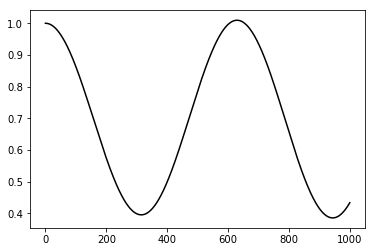

In [63]:
plt.plot(2*avac, '-k')
plt.show()

In [64]:
# determine the flavor at z = L

rhoL = np.array([ [ avac[-1], brvac[-1] + 1j *  bivac[-1] ], [ brvac[-1] - 1j *  bivac[-1], -avac[-1] ]  ] )

In [65]:
rhoL

array([[ 0.21681389+0.j        , -0.43257393-0.15411246j],
       [-0.43257393+0.15411246j, -0.21681389+0.j        ]])